# Exploratory Analysis and Visualisation on Steam
***
## Essential Libraries
Let us begin by importing essential libraries
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

## 1. Importing Steam Dataset

In [2]:
# import the datasets
steam = pd.read_csv('ZH/steam_cleaned.csv')
print('Number of Rows: {}'.format(steam.shape[0]))
print('Number of Columns: {}'.format(steam.shape[1]))
steam.head()

Number of Rows: 62057
Number of Columns: 16


,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,229766,5992,9847,169,10000000-20000000,10.00
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,7005,1069,167,25,5000000-10000000,5.25
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled;Family S...,Action,FPS;World War II;Multiplayer,6036,664,553,17,5000000-10000000,5.25
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,2415,511,70,13,5000000-10000000,5.25
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,20697,1054,406,157,2000000-5000000,5.25


In [3]:
# check for missing values
steam.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           1
platforms           0
categories          0
genres              0
steamspy_tags       0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [4]:
steam.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
categories           object
genres               object
steamspy_tags        object
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

## 1.1 Description of the Steam Dataset
​
> **appid**: Unique ID for each game <br>
> **name**: Name of each game <br>
> **release_date**: Total games released, releases by year, highest daily releases <br>
> **english**: Indicates (0 or 1) whether the game supports English <br>
> **developer**: Developers that released the game <br>
> **publisher**: Publishers that released game <br>
> **platforms**: Operating systems the game can be played on <br>
> **categories**: <br>
> **genres**: Most popular genres <br>
> **steamspy_tags**: <br>
> **positive_ratings & negative_ratings** : average pos:neg ratio, top games by positive ratings with negative ratings shown at the side <br>
> **average_playtime & median_playtime** : most played game, distribution of playtime <br>
> **owners**: most owned game, distribution of game owners <br>
> **price**: Price of the game in SGD <br>

In [5]:
import plotly.express as px
import plotly.figure_factory as ff

## 2. `platforms`


In [6]:
# examine platforms
platforms = pd.DataFrame(steam['platforms'].value_counts())
platforms

,platforms
windows,46217
windows;mac;linux,7334
windows;mac,6448
windows;linux,2049
linux,4
mac,4
mac;linux,1


## 2.1 Visualisation with Venn Diagram
- Most games are supported by the `Windows` platform.
- Due to overlapping between categories, instead of a bar chart we can use a **Venn diagram** for better overall visualisation.
- We will use `matplotlib-venn` module to build the Venn diagram #- pip install matplotlib-venn
> Note: plotting the **Venn Diagram**, the label positions would be:
> - '01': Label for the intersection of `Windows` and `Mac`.
> - '001': Label for the intersection of `Mac` and `Linux`.
> - '101': Label for the intersection of `Windows` and `Linux`.
> - '110': Label for the intersection of all three platforms (`Windows`, `Mac`, and `Linux`).
> - 'A': Label for platforms only on `Windows`.
> - 'B': Label for platforms only on `Mac`.
> - 'C': Label for platforms only on `Linux`.


In [7]:
# assign values to the subset
venn_subsets = (platforms.loc['windows']['platforms'], 
                platforms.loc['mac']['platforms'], 
                platforms.loc['windows;mac']['platforms'], 
                platforms.loc['linux']['platforms'], 
                platforms.loc['windows;linux']['platforms'], 
                platforms.loc['mac;linux']['platforms'], 
                platforms.loc['windows;mac;linux']['platforms'])

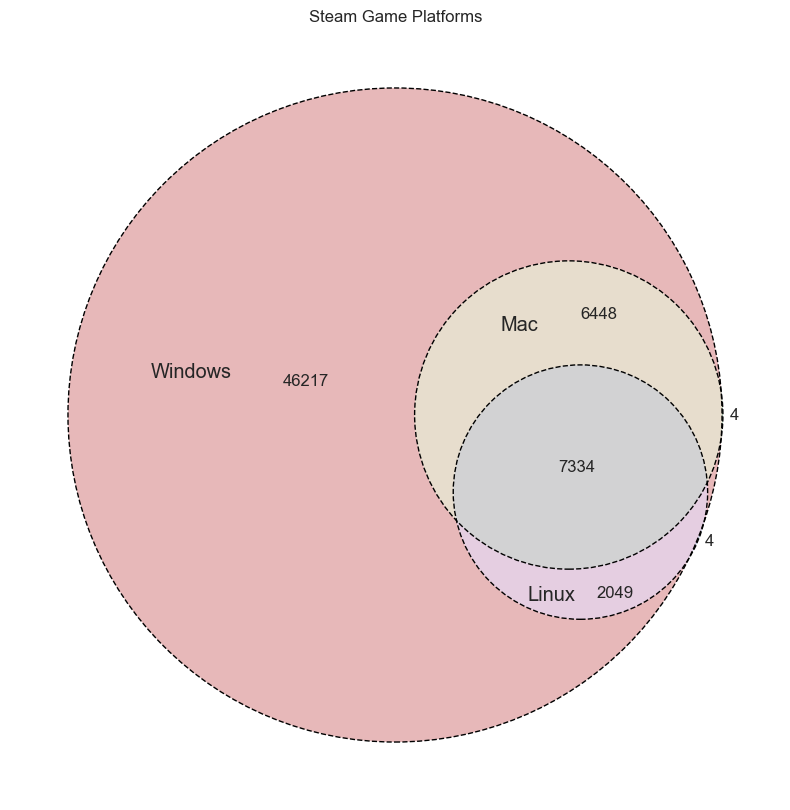

In [8]:
# plot the Venn diagram for platforms
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Define the subsets for the Venn diagram
venn_subsets = (platforms.loc['windows']['platforms'], 
                platforms.loc['mac']['platforms'], 
                platforms.loc['windows;mac']['platforms'], 
                platforms.loc['linux']['platforms'], 
                platforms.loc['windows;linux']['platforms'], 
                platforms.loc['mac;linux']['platforms'], 
                platforms.loc['windows;mac;linux']['platforms'])

# Plot the Venn diagram
vd = venn3(subsets=venn_subsets, set_labels=('Windows', 'Mac', 'Linux'))

# Outline the circles
venn3_circles(subsets=venn_subsets, linestyle='dashed', linewidth=1)

# Adjust label positions
label_positions = {
    '01': (0.02, 0),
    '001': (0.02, 0),
    '101': (0.05, -0.01),
    '110': (0.1, 0.02),
    'A': (0, -0.5),
    'B': (-0.25, -0.12),
    'C': (-0.05, 0.08)
}

for label_id, (dx, dy) in label_positions.items():
    lbl = vd.get_label_by_id(label_id)
    x, y = lbl.get_position()
    lbl.set_position((x + dx, y + dy))

# Set title
plt.title('Steam Game Platforms')

# Show the plot
plt.show()


## Observation and Analysis : Steam Game Platforms

The chart shows the distribution of game categories on Steam. The most popular category is `Single-player`, followed by `Multi-player`, `Steam Achievements`, and `Full controller support`. This suggests that single-player games are dominant on Steam, but there's also a significant number of games that support multiplayer modes.

* Further analysis ideas:
    * Refine category definitions to distinguish between single/multiplayer.
    * Group related categories (e.g., multiplayer-related categories).
    * Investigate data points on the number of players supported per game.

## 3 Categories
Since `categories` are separated by semicolons, similar to platforms, we'll need to split them into lists for better analysis.

In [9]:
steam['categories'].head()

0    Multi-player;PvP;Online PvP;Shared/Split Scree...
1    Multi-player;PvP;Online PvP;Shared/Split Scree...
2    Multi-player;Valve Anti-Cheat enabled;Family S...
3    Multi-player;PvP;Online PvP;Shared/Split Scree...
4    Single-player;Multi-player;Valve Anti-Cheat en...
Name: categories, dtype: object

In [10]:
# Split categories into lists
steam['categories'] = steam['categories'].str.split(';')

## 3.1 Visualisation with Bar Charts
Now, let's explore the `categories` column to understand the distribution of different categories and identify the most popular ones.

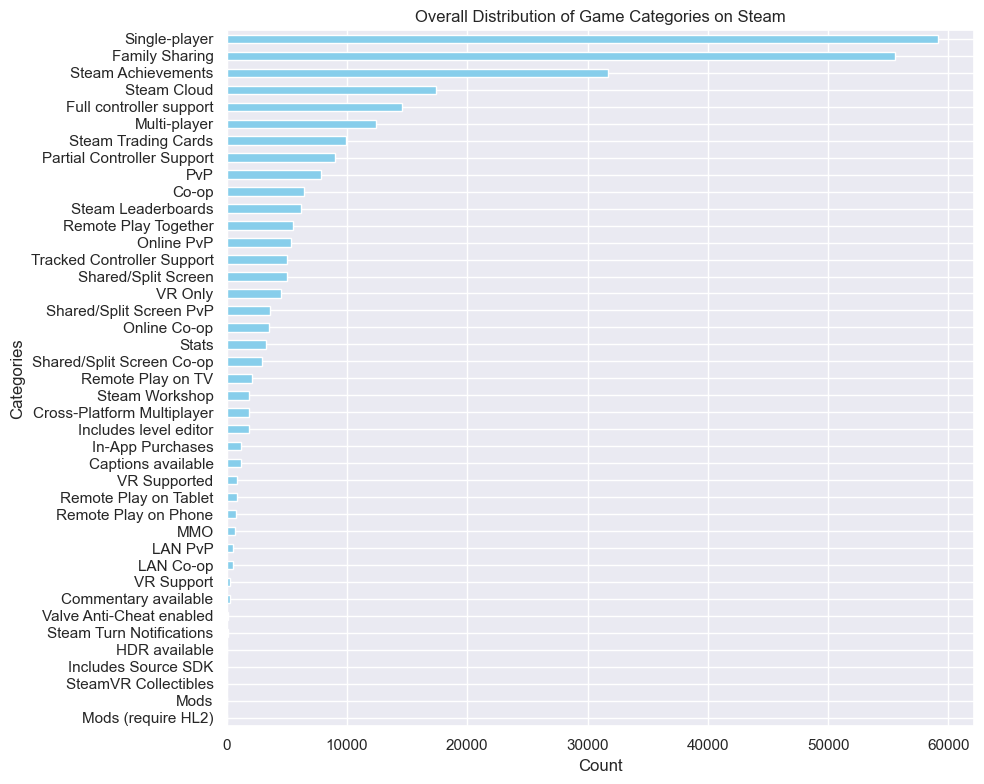

In [11]:
# Get value counts of each category
categories_count = steam['categories'].explode().value_counts()

# Plot the distribution of categories horizontally
plt.figure(figsize=(10, 8))  # Adjust the figure size
categories_count.sort_values().plot(kind='barh', color='skyblue')  # Use barh for horizontal bar plot
plt.title('Overall Distribution of Game Categories on Steam')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Number of unique labels: 41
Number of total labels applied: 283798
['Multi-player', 'PvP', 'Online PvP', 'Shared/Split Screen PvP', 'Valve Anti-Cheat enabled', 'Family Sharing', 'Remote Play Together', 'Single-player', 'Steam Achievements', 'Full controller support']


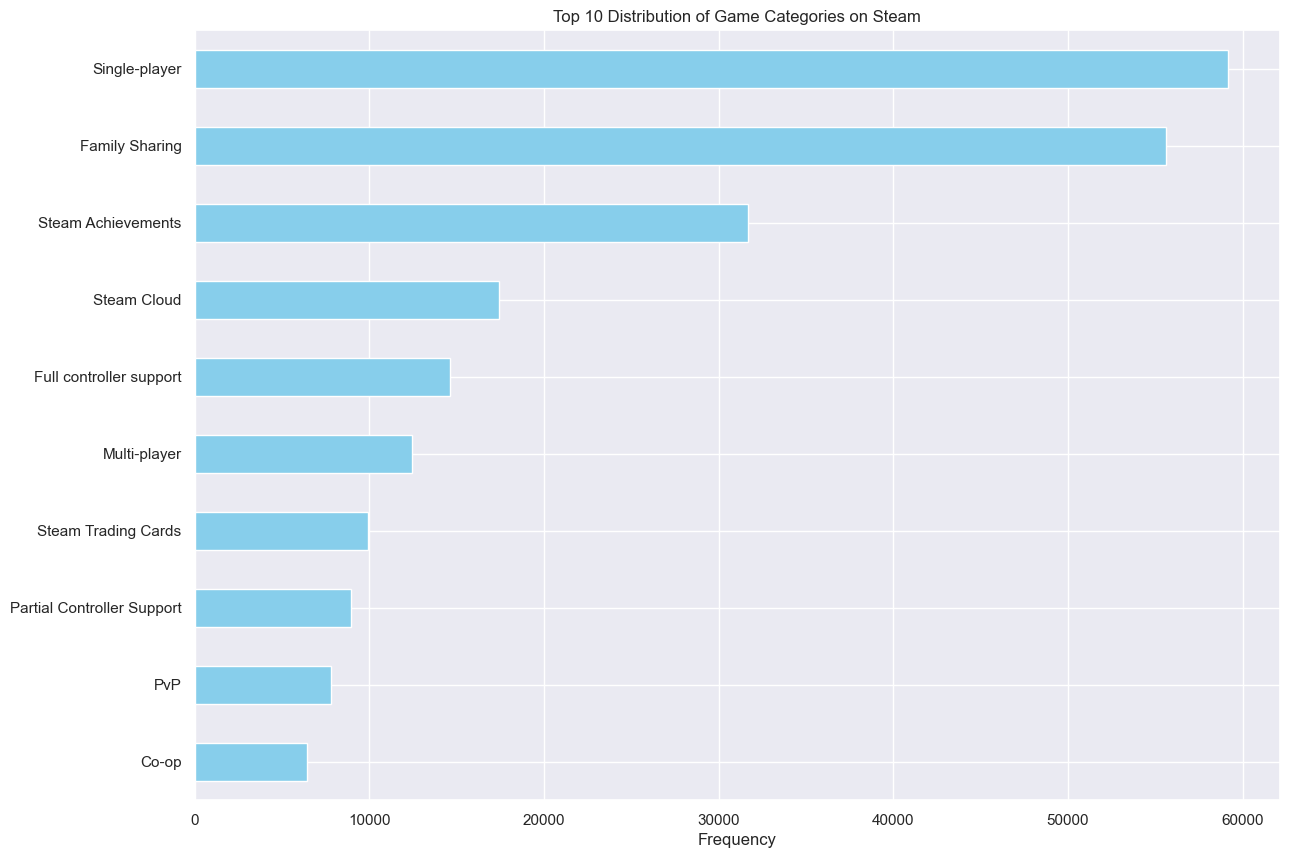

In [12]:
# Define a function to list all existing labels and include all occurrences in another list
def get_labels(data):
    unique_labels = []
    all_labels = []

    for i in range(len(data)):
        for label in data[i]:
            all_labels.append(label)
            if label not in unique_labels:
                unique_labels.append(label)
  
    print('Number of unique labels:', len(unique_labels))
    print('Number of total labels applied:', len(all_labels))
  
    return unique_labels, all_labels

# List all existing categories and include all occurrences in another list
unique_categories, all_categories = get_labels(steam['categories'])

# Display the first 10 unique categories
print(unique_categories[:10])

# Visualize the top 10 categories
plt.figure(figsize=(14, 10))
pd.Series(all_categories).value_counts()[:10].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Top 10 Distribution of Game Categories on Steam')
plt.show()


## Observation and Analysis: Distribution of Game Categories on Steam

The chart shows the distribution of game categories on Steam. The most popular category is `Single-player`, followed by `Multi-player`, `Steam Achievements`, and `Full controller support`. This suggests that single-player games are dominant on Steam, but there's also a significant number of games that support multiplayer modes.

* Further analysis ideas:
    * Refine category definitions to distinguish between single/multiplayer.
    * Group related categories (e.g., multiplayer-related categories).
    * Investigate data points on the number of players supported per game.

## 4. Owners

In [13]:
# Check unique values and basic statistics of the 'owners' column
print("Unique values in 'owners' column:")
print(steam['owners'].unique())
print("\nBasic statistics of 'owners' column:")
steam['owners'].describe()

Unique values in 'owners' column:
['10000000-20000000' '5000000-10000000' '2000000-5000000'
 '50000000-100000000' '200000000-500000000' '100000000-200000000'
 '20000-50000' '500000-1000000' '100000-200000' '0-20000' '200000-500000'
 '50000-100000' '1000000-2000000' '20000000-50000000']

Basic statistics of 'owners' column:


count       62057
unique         14
top       0-20000
freq        41168
Name: owners, dtype: object

## 4.1 Pre-processing and Splitting Lower and Upper Bounds
Next, we'll split the lower and upper bounds of the `owners` column into a temporary DataFrame to calculate the median number of owners.   

We also converted owners into a usable integer format by keeping the upper bound.
- Alternatively, could keep the upper bound or mid-point.
- By setting an upper bound, we focus on games with a more established player base.
- Games with very few owners might have a small, unrepresentative sample of reviews that skew the overall rating.

In [14]:
# Split lower and upper bounds into a temporary DataFrame
tmp_owners = pd.DataFrame()
tmp_owners[['lower', 'upper']] = steam['owners'].str.split('-', expand=True)
tmp_owners['lower'] = tmp_owners['lower'].astype(int)
tmp_owners['upper'] = tmp_owners['upper'].astype(int)
tmp_owners['owner_median'] = (tmp_owners['lower'] + tmp_owners['upper']) / 2
tmp_owners.head()

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,2000000,5000000,3500000.0


In [15]:
# insert the owner upper bound into owners in steam df
steam['owners'] = tmp_owners['upper']


## 4.2 Visualisation with a Bar Plot: Distribution of Owners
- The overall distibution of `owners` most appear to be around 20k. 
- We can also explore for the most popular games in terms of ownership.

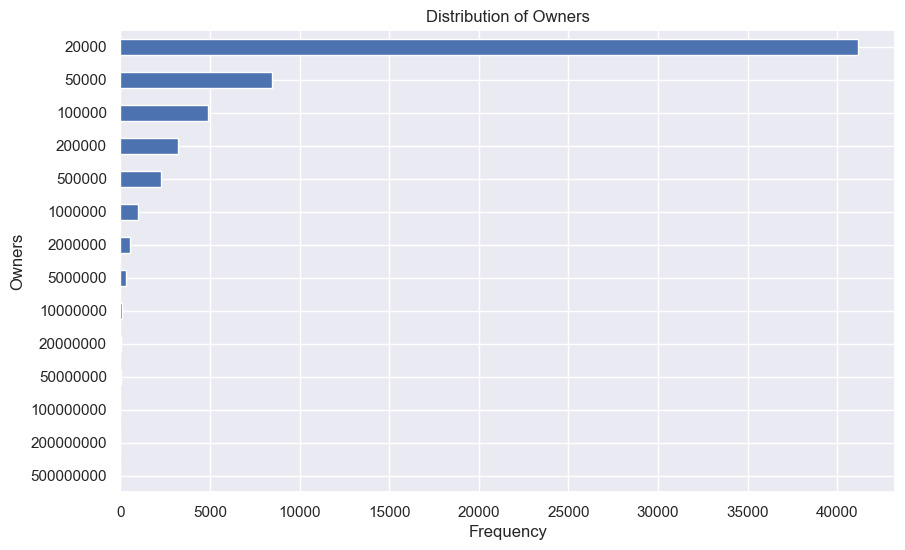

In [16]:
# Distribution of overall owner_median
plt.figure(figsize=(10, 6))
steam['owners'].value_counts().sort_index().plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Owners')
plt.title('Distribution of Owners')
plt.show()


In [17]:
# top games by owners
steam.sort_values(by = 'owners', ascending = False).head(10)[['name', 'owners']]

,name,owners
19,Dota 2,500000000
22,Counter-Strike 2,200000000
48205,Palworld,100000000
18,Left 4 Dead 2,100000000
33908,Apex Legends™,100000000
12578,PUBG: BATTLEGROUNDS,100000000
30100,New World,100000000
1443,PAYDAY 2,50000000
1597,Warframe,50000000
7519,Wallpaper Engine,50000000


## 4.2.1 Analysis
Our analysis of ownership reveals a concentration of games within the 0-20,000 owner range. This suggests a large portion of the games have a relatively small established player base.  

While the visualization might not clearly show it, there exists a small but significant tail of games with ownership exceeding 2 million (under 5,000 games). This indicates the presence of titles with a considerably larger player base.

Key Takeaways:

- The majority of games have a player base of under 20,000 owners.
- A small but noteworthy portion of games boasts a player base exceeding 2 million.
- A select few games have achieved immense popularity, exceeding 100 million owners.


Since the games that exceed 100 million owners are not readily apparent in the bar chart, we went to analyse the top games in ownership.


#### **Top games contenders (by owners)**
 > 1st: **Dota 2** (500,000,000 owners)  
 > 2nd: **Counter-Strike 2** (approx. 200,000,000 owners)  
 > 3rd: **Palworld, Left 4 Dead 2, Apex Legends, PUBG: BATTLEGROUNDS, New World** (approx. 100,000,000 owners)  

**Dota 2** reigns supreme with a staggering owner count of 500,000,000, **more than double** the owner of **Counter-Strike 2**, the runner-up. The remaining games in the top few seem to have a count of around 100,000,000.
- The significant gap of owners between **Dota 2** and the rest suggests its immense popularity on Steam.
- It's important to acknowledge potential data limitations, a high ownership median with a lower rating might indicate insufficient data.


## 4.3 Visualisation with Box Plot: `owners` vs `overall_rating`
We aim to make a boxplot visualizing the distribution of overall ratings across different ownership categories.
- Since we only have `positive_ratings` and `negative_ratings`, it might be a good idea to make a function that estimates an overall rating score.
- `overall_rating`:
> - We made a function that a rating score that considers both `positive_ratings` and `negative_ratings` 
> - **row** (pandas.Series): A row from a pandas DataFrame containing `positive_ratings` and `negative_ratings` columns.  
> - It will return overall rating score as a percentage (0 to 100).

The box plots will compare the ratings of games with 20,000 owners or more to the entire dataset.
Applies the function to calculate the `overall_rating` for each game in steam.
> **X-axis**: Categorical variable indicating owner category ("Low Ownership" or "High Ownership").  
> **Y-axis**: The calculated `overall_rating`.  
> **Data**: The steam DataFrame with an assigned owner catergory based on the ownership threshold (Low = <= 20,000, High > 20,000).



In [18]:
import math
def overall_rating(row):
    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg

    # Check for division by zero (no reviews)
    if total_reviews == 0:
          return 0  # Handle case with no reviews (set rating to 0)

    average = pos / total_reviews

    # Adjust score towards 50%, stronger adjustment for fewer reviews
    score = average - (average * 0.5) * 2**(-math.log10(total_reviews + 1))

    return score * 100


In [19]:
# Apply overall_rating function to calculate overall rating
steam['overall_rating'] = steam.apply(overall_rating, axis=1)


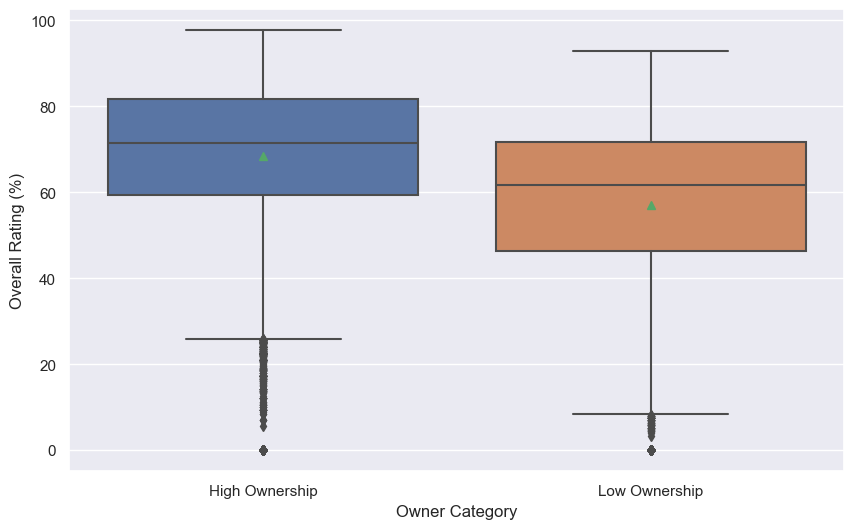

In [20]:
# Apply overall_rating function to calculate overall rating
steam['overall_rating'] = steam.apply(overall_rating, axis=1)

# Assuming you have an 'owners' column for categorizing by ownership
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    x="owners_category",  
    y="overall_rating",
    showmeans=True,
    data=steam.assign(owners_category=lambda x: ['Low Ownership' if i <= 20000 else 'High Ownership' for i in x['owners']])
)

ax.set(xlabel="Owner Category", ylabel="Overall Rating (%)")  # Adjust labels for clarity
plt.show()


In [21]:
print("Games with less than 20,000 owners:", steam[steam['owners'] <= 20000].shape[0])
print("Games with more than 20,000 owners:", steam[steam['owners'] > 20000].shape[0])


Games with less than 20,000 owners: 41168
Games with more than 20,000 owners: 20889


## Analysis on Box Plot
Over 40,000 games fall under 20,000 owners, about 3/5 of the data, hence analysing these games under 20,000 may still have an impact on future analysis.

Potential Trends:  
By comparing the positions and shapes of the boxes, we can observe trends in how ratings are distributed across ownership categories.
> - **The medians** (50th percentiles) of the boxes might indicate that games with lower ownership tend to have slightly lower overall ratings compared to games with higher ownership.
> - **The interquartile ranges (IQR)** and the spread of the whiskers can reveal if the ratings for low-ownership games are more or less variable compared to high-ownership games.
> - **Outliers**: The presence of outliers (data points beyond the whiskers) might indicate individual games with exceptional overall ratings (or very low ratings) within each ownership category. In this case, the very low rating outliers are more obvious.

Possible Explanations:  
There could be a couple of reasons why games with lower ownership might have slightly lower median ratings:
> - **Sample Size**: Games with fewer owners might have a smaller pool of reviews, potentially leading to less reliable overall ratings.  
> - **Newer Releases**: Low-ownership games could tend to be newer releases that haven't yet had enough time to accumulate a substantial number of reviews. This can affect the overall rating, especially if the game is still under development or recently launched with initial bugs.

## 4.4 Correalation Matrix of comparing `owners` against`positive_ratings` and `negative_ratings`

In [22]:
# Assuming you have these columns, select them for the correlation analysis
data = steam.copy()
numerical_data = data[['owners', 'positive_ratings', 'negative_ratings']]
correlation = numerical_data.corr()

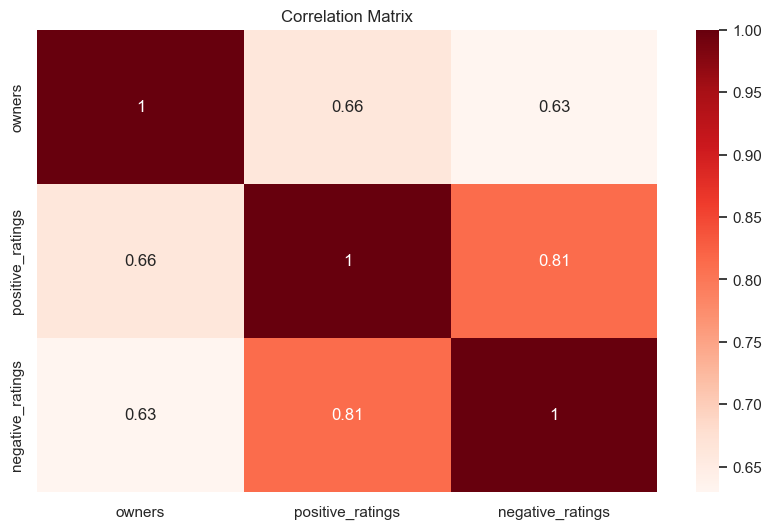

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create heatmap with annotations and color gradient
sns.heatmap(correlation, annot=True, cmap = 'Reds')

# Adjust labels for clarity (optional)
ax.set_title('Correlation Matrix')
plt.show()


## 4.4.1 Analysis of correlations between `owners` vs positive and negative ratings

`owners` and `positive_ratings`:    
> **Moderate positive correlation (0.66)**    
This suggests that games with a larger player base (more owners) tend to have more positive reviews.  
This could be due to factors like increased popularity,attracting more attention and reviews.  
Games with a higher overall rating (previously analyzed) attracting more owners who leave positive reviews.

`owners` and `negative_ratings`: 
> **Moderate positive correlation (0.63)**   
Although slightly less strong correlation than `positive_ratings`, it suggests that games with a larger player base might also have a slightly higher number of negative reviews alongside the positive ones. 

Possible Explanations:
> - **Diverse Player Base**: A larger player base can encompass a wider range of opinions, leading to both positive and negative reviews.  
> - **Scrutiny and Attention**: Games with a larger audience might be subject to more scrutiny and criticism due to potential higher expectations, potentially leading to a higher number of negative reviews.   
> - **Review Biases**: Certain game genres or platforms might have biases where popular games or those with larger communities tend to get more reviews of all types (positive and negative).



## 5. Genre

In [24]:
# clean the values into lists
steam['genres'] = steam['genres'].apply(lambda x: x.split(";"))

In [25]:
from collections import Counter
# Analyze genre distribution
genre_counts = Counter()
for genres in steam['genres']:
    genre_counts.update(genres)  # Count occurrences of each genre in the lists

print("Genre Counts:")
for genre, count in genre_counts.most_common():
    print(f"{genre}: {count}")

# Get unique genres
unique_genres = set().union(*steam['genres'])
print(f"\nUnique Genres: {unique_genres}")

Genre Counts:
Indie: 45143
Action: 27107
Casual: 25304
Adventure: 25156
Simulation: 12836
Strategy: 12544
RPG: 11019
Early Access: 6326
Free to Play: 3171
Sports: 3059
Racing: 2444
Massively Multiplayer: 1378
Violent: 471
Utilities: 348
Gore: 291
Education: 194
Design & Illustration: 190
Animation & Modeling: 149
Nudity: 109
Video Production: 100
Sexual Content: 99
Game Development: 69
Audio Production: 67
Software Training: 61
Web Publishing: 32
Photo Editing: 32
Accounting: 5
Movie: 1

Unique Genres: {'RPG', 'Education', 'Sports', 'Indie', 'Gore', 'Audio Production', 'Simulation', 'Casual', 'Software Training', 'Accounting', 'Design & Illustration', 'Strategy', 'Violent', 'Utilities', 'Game Development', 'Nudity', 'Adventure', 'Movie', 'Video Production', 'Action', 'Animation & Modeling', 'Racing', 'Early Access', 'Web Publishing', 'Sexual Content', 'Photo Editing', 'Free to Play', 'Massively Multiplayer'}


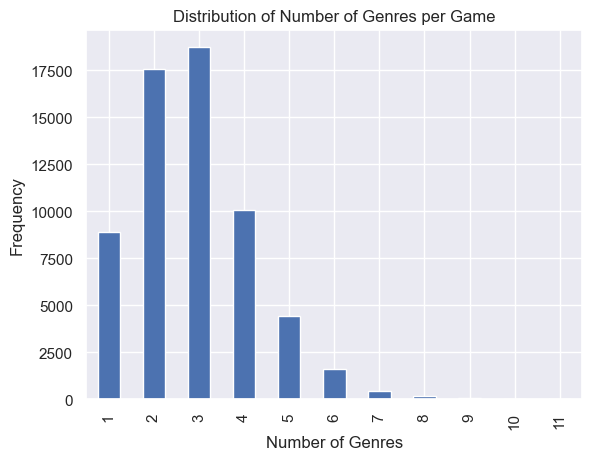

Number of unique labels: 28
Number of total labels applied: 177705
Number of unique genres: 28


In [26]:
# Number of categories for each game
plt.figure()
steam['genres'].apply(lambda x: len(x)).value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Genres per Game')
plt.show()

# List all existing genres and include all occurrences in another list
unique_genres, all_genres = get_labels(steam['genres'])
print("Number of unique genres:", len(unique_genres))


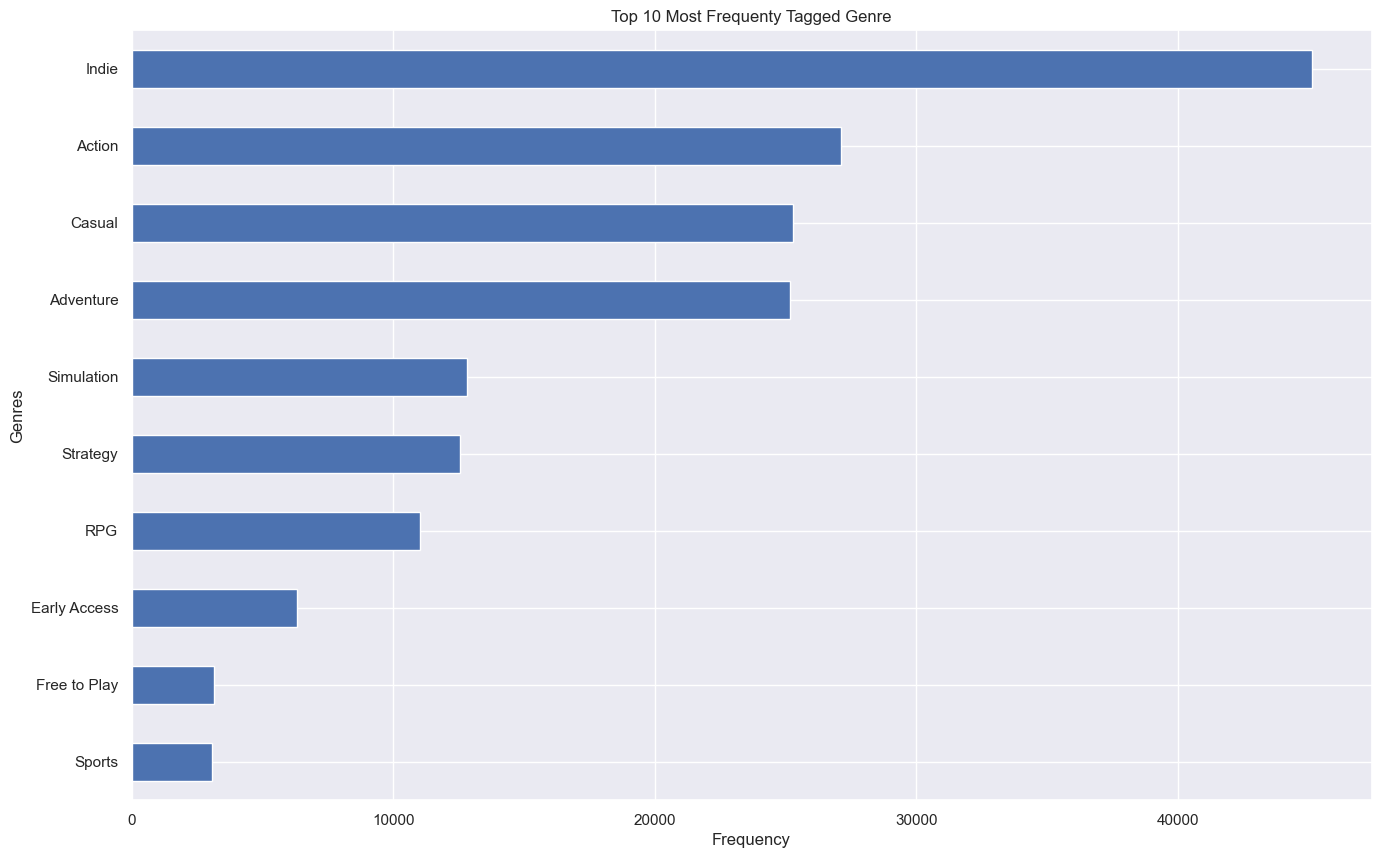

In [27]:
# Visualize the top 10 most frequent genres
plt.figure(figsize=(16, 10))
pd.Series(all_genres).value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Top 10 Most Frequenty Tagged Genre')
plt.show()

## Analysis of Genre Distribution

Genre Counts:
- It's common for one game to have more than 1 genre.
- 'Indie' is the most tagged genre. 'Indie' actually reference games made by independent smaller companies.
- Other popular tagged genres include 'Action', 'Casual', and 'Adventure'.

Unique Genres:
- There are a wide variety of genres, including 'Strategy,' 'RPG,' 'Simulation,' as well as less common ones like 'Movie,' 'Accounting,' and 'Web Publishing.'
- We can keep the 'main' genres similar to steam store and exclude ambiguous tags before performing more analysis. (e.g, 'Free to Play', 'Nudity', 'Tutorial', 'Early Access' etc.)

## 5.2 Genre Comparison by average `owners`  per `genre`
Let's plot a comparison of genre distribution and average owners per genre.
First, as explored before, we shall extract the 'main' genres.

In [28]:
main_genres= [ # keep the 'main' genres similar to steam store
        # 'Accounting',
        'Action',
        'Adventure',
        # 'Animation & Modeling',
        # 'Audio Production',
        'Casual',
        # 'Design & Illustration',
        # 'Documentary',
        # 'Early Access',
        # 'Education',
        # 'Free to Play',
        # 'Game Development',
        # 'Gore',
        'Indie',
        'Massively Multiplayer',
        # 'Nudity',
        # 'Photo Editing',
        'RPG',
        'Racing',
        # 'Sexual Content',
        'Simulation',
        # 'Software Training',
        'Sports',
        'Strategy'
        # 'Tutorial',
        # 'Utilities',
        # 'Video Production',
        # 'Violent',
        # 'Web Publishing'
]

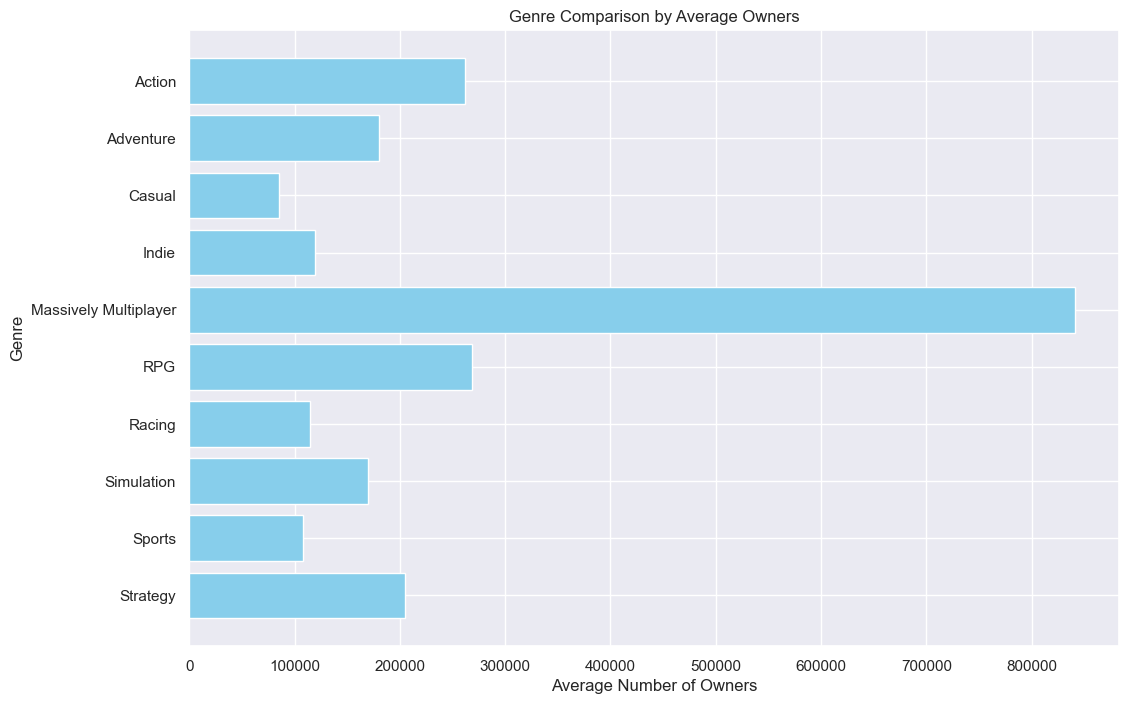

In [29]:
# Calculate the average number of owners per genre
average_owners_per_genre = {}
for genre in main_genres:
    average_owners_per_genre[genre] = steam[steam['genres'].apply(lambda x: genre in x)]['owners'].mean()

# Plot the comparison
plt.figure(figsize=(12, 8))
plt.barh(main_genres, [average_owners_per_genre[genre] for genre in main_genres], color='skyblue')
plt.xlabel('Average Number of Owners')
plt.ylabel('Genre')
plt.title('Genre Comparison by Average Owners')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most owners at the top
plt.show()


## Analysis of `genre` and `owners`
These genres are based on average owners per game, consumer popularity in the market and potentionally in high demand.

High Average Owners: May indicates a popular genre with a large potential audience, likely willing to buy new games in that genre.    
Low Average Owners: May indicate a niche genre with a smaller, more specific audience.  
- 'Massively Multiplayer' seems to be the most owned genre.
- 'Strategy' , 'Action' and 'RPG' are also seems to be popular

Should we be surprised that 'Indie', that was the most frequently tagged genre, has less ownership? 
- Since 'Indie', although labelled as a genre, is more like a tag or category with the meaning "Independent", games made without financial backing from big companies.
- Certainly there generally would be a big variation of genres although labelled as an 'Indie' game.
- However, could this mean that people may tend to buy games from bigger or well-known companies rather than games made by smaller companies?



## 6. `release_date`
- categorised the dates by year

In [30]:
# convert release_date to datetime type and create separate column for release_year
steam['release_date'] = steam['release_date'].astype('datetime64[ns]')
steam['release_year'] = steam['release_date'].apply(lambda x: x.year)

C:\Users\roche\AppData\Local\Temp\ipykernel_17088\1123857333.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  steam['release_date'] = steam['release_date'].astype('datetime64[ns]')


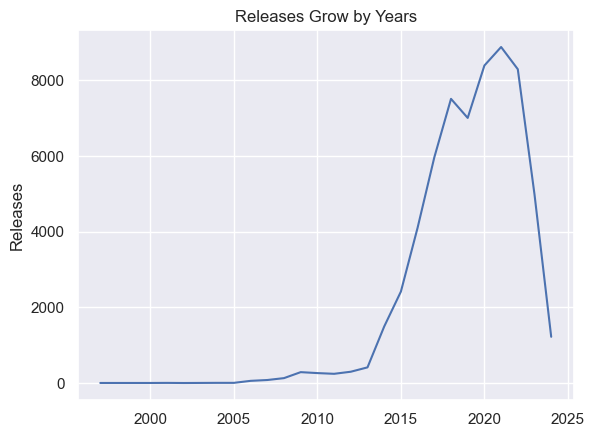

In [31]:
# release date by year
plt.figure()
steam['release_date'].dt.year.value_counts().sort_index().plot(kind = 'line')
plt.ylabel('Releases')
plt.title('Releases Grow by Years')
plt.show()

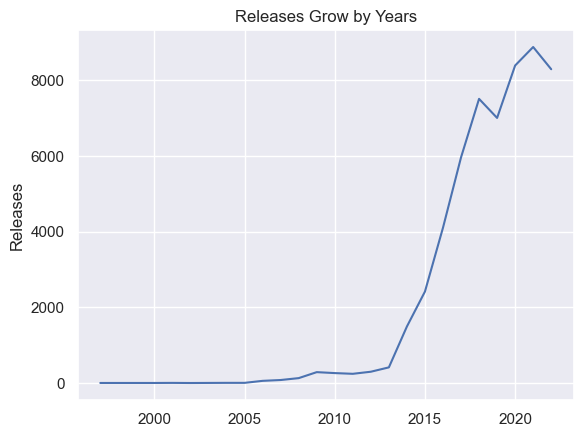

In [32]:
# release date by year, exclude 2025 and 2024 (since our data is collected till mid 2024, it's incomplete)
plt.figure()
steam['release_date'].dt.year.value_counts().sort_index()[:-2].plot(kind = 'line')
plt.ylabel('Releases')
plt.title('Releases Grow by Years')
plt.show()

In [33]:
steam.head(n=10)

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,overall_rating,release_year
0,10,Counter-Strike,2000-01-11,1,Valve,Valve,windows;mac;linux,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],Action;FPS;Multiplayer,229766,5992,9847,169,20000000,10.00,96.282119,2000
1,20,Team Fortress Classic,1999-01-04,1,Valve,Valve,windows;mac;linux,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],Action;FPS;Multiplayer,7005,1069,167,25,10000000,5.25,83.868476,1999
2,30,Day of Defeat,2003-01-05,1,Valve,Valve,windows;mac;linux,"[Multi-player, Valve Anti-Cheat enabled, Famil...",[Action],FPS;World War II;Multiplayer,6036,664,553,17,10000000,5.25,86.913690,2003
3,40,Deathmatch Classic,2001-01-06,1,Valve,Valve,windows;mac;linux,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],Action;FPS;Classic,2415,511,70,13,10000000,5.25,78.802390,2001
4,50,Half-Life: Opposing Force,1999-01-11,1,Gearbox Software,Valve,windows;mac;linux,"[Single-player, Multi-player, Valve Anti-Cheat...",[Action],FPS;Action;Classic,20697,1054,406,157,5000000,5.25,92.800927,1999
5,60,Ricochet,2000-01-11,1,Valve,Valve,windows;mac;linux,"[Multi-player, PvP, Online PvP, Valve Anti-Che...",[Action],Action;FPS;Multiplayer,4604,995,23,4,10000000,5.25,79.169277,2000
6,80,Counter-Strike: Condition Zero,2004-01-03,1,Valve,Valve,windows;mac;linux,"[Single-player, Multi-player, Valve Anti-Cheat...",[Action],Action;FPS;Shooter,22540,2144,3028,27,10000000,10.00,89.140238,2004
7,130,Half-Life: Blue Shift,2001-01-06,1,Gearbox Software,Valve,windows;mac;linux,"[Single-player, Remote Play Together, Family S...",[Action],FPS;Action;Sci-fi,14671,1266,273,103,10000000,5.25,89.556080,2001
8,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,"[Single-player, Steam Achievements, Full contr...",[Action],FPS;Action;Sci-fi,185234,4521,804,454,10000000,10.00,96.359681,2004
9,240,Counter-Strike: Source,2004-01-11,1,Valve,Valve,windows;mac;linux,"[Multi-player, Cross-Platform Multiplayer, Ste...",[Action],Shooter;FPS;Action,162702,6259,8206,451,20000000,10.00,95.010737,2004


## 6.2 Visualisation of `owners` and `release_date` by year 
# CAN HELP CHOOSE WHICH ONE?
Visualising the distribution of ownership categories (under 20,000 and over 20,000 owners) across different release years

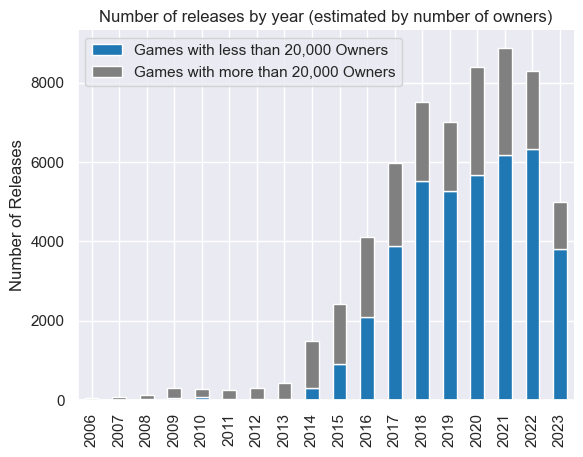

In [34]:
df = steam.copy()

release_years = []  
low_ownership = []
high_ownership = []

for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2023:
        # Ignore years outside the range (adjust if needed)
        continue

    # Subset by release year
    year_df = df[df['release_year'] == year]

    # Calculate owner count categories (adjust thresholds if needed)
    total_low_ownership = year_df[year_df['owners'] <= 20000].shape[0]
    total_high_ownership = year_df[year_df['owners'] > 20000].shape[0]

    release_years.append(year)
    low_ownership.append(total_low_ownership)
    high_ownership.append(total_high_ownership)

# Create DataFrame for visualization
owners_df = pd.DataFrame(zip(release_years, low_ownership, high_ownership),
                          columns=['Release Year', 'Games with less than 20,000 Owners', 'Games with more than 20,000 Owners'])

ax = owners_df.plot(x='Release Year', y=[1, 2], kind='bar', stacked=True, color=['tab:blue', 'gray'])

ax.set_xlabel('')
ax.set_ylabel('Number of Releases')
ax.set_title('Number of releases by year (estimated by number of owners)')
sns.despine()
plt.show()

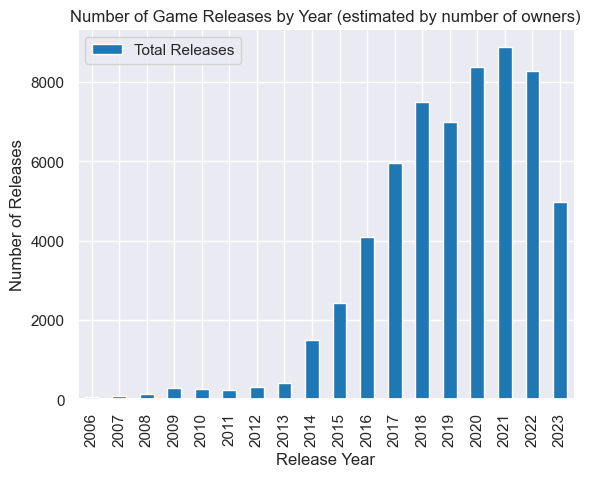

In [35]:
release_years = []
total_releases = []

for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2023:
        continue  # Ignore years outside the range

    # Subset by release year
    year_df = df[df['release_year'] == year]

    # Check if there are games for this year
    if len(year_df) == 0:
        continue  # Skip years with no games

    # Calculate total releases for the year
    total_releases.append(year_df.shape[0])
    release_years.append(year)

# Check if any data was found within the specified year range
if not release_years:
    print("No data found for release years between 2006 and 2023.")
else:
    # Create DataFrame for visualization (single column)
    owners_df = pd.DataFrame({'Release Year': release_years, 'Total Releases': total_releases})

    # Create a bar chart for total releases
    ax = owners_df.plot(x='Release Year', y='Total Releases', kind='bar', color='tab:blue')

    ax.set_xlabel('Release Year')
    ax.set_ylabel('Number of Releases')
    ax.set_title('Number of Game Releases by Year (estimated by number of owners)')
    sns.despine()
    plt.show()


## Analysis IDK UH
- Games released more recently won't have had the same amount of time to generate sales as games released a long time ago.   

Possible Insights from the Trend:
- **Easier Steam Access**: Platforms like Steam Greenlight (2012) and Steam Direct (2017) made it easier for independent developers to publish games. No wonder during (2012-2017) we see a significant increase.
- **Covid-19 Pandemic**: A noticeable increase from 2019 to 2020 and stays high till 2022. Lockdowns and stay-at-home orders led to a surge in video game playing. This increased demand might have incentivised developers to release games even during challenging circumstances.

## 7. Categorical Columns
Analysing columns which have categorical data: [`english`, `developer`, `publisher`]

In [36]:
# categorical columns
steam_cat = ['english', 'developer', 'publisher']

## 7.1 English Column

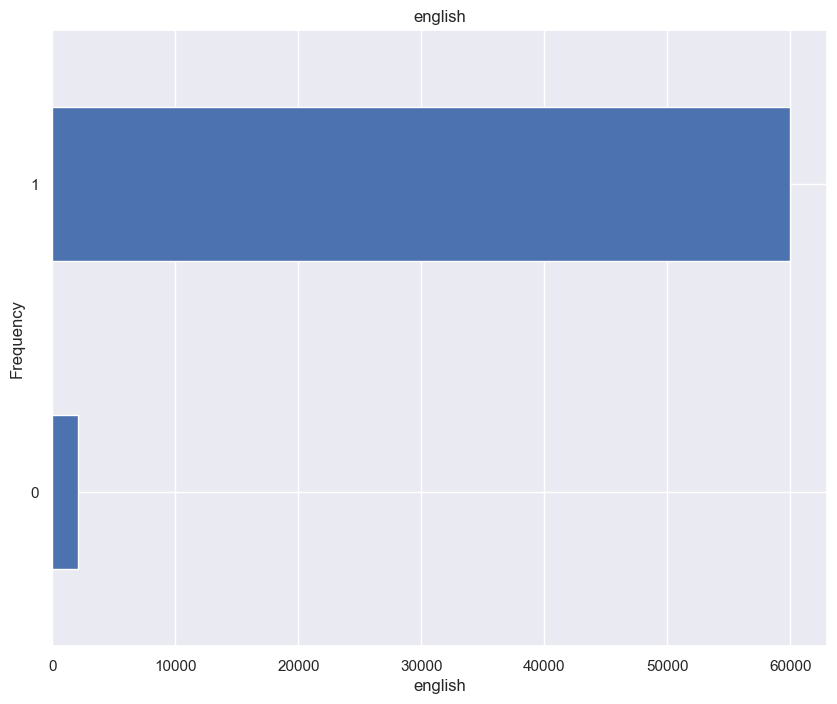

Total number of categories in english: 2
1    59988
0     2069
Name: english, dtype: int64




In [37]:
column = 'english'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(2).plot(kind = 'barh')
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(2))
#print(df)
print('\n')

## 7.1 Observation
- **English Plot:** We can see from the 1st plot an overwhelming number of games support english **(96%)**, ratio of 59.9k : 2.1k. The game might need to be able to played in English for it to be successful. However, this might not be case as our English column only takes into account games that support English or Not. Games that support English might also support other languages. 

**(Maybe can plot English with Popularity (nid define) of game)**

## 7.2 Developers Column

C:\Users\roche\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29611 (\N{CJK UNIFIED IDEOGRAPH-73AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roche\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29808 (\N{CJK UNIFIED IDEOGRAPH-7470}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roche\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roche\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roche\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  fig.canvas.print_figure(bytes_

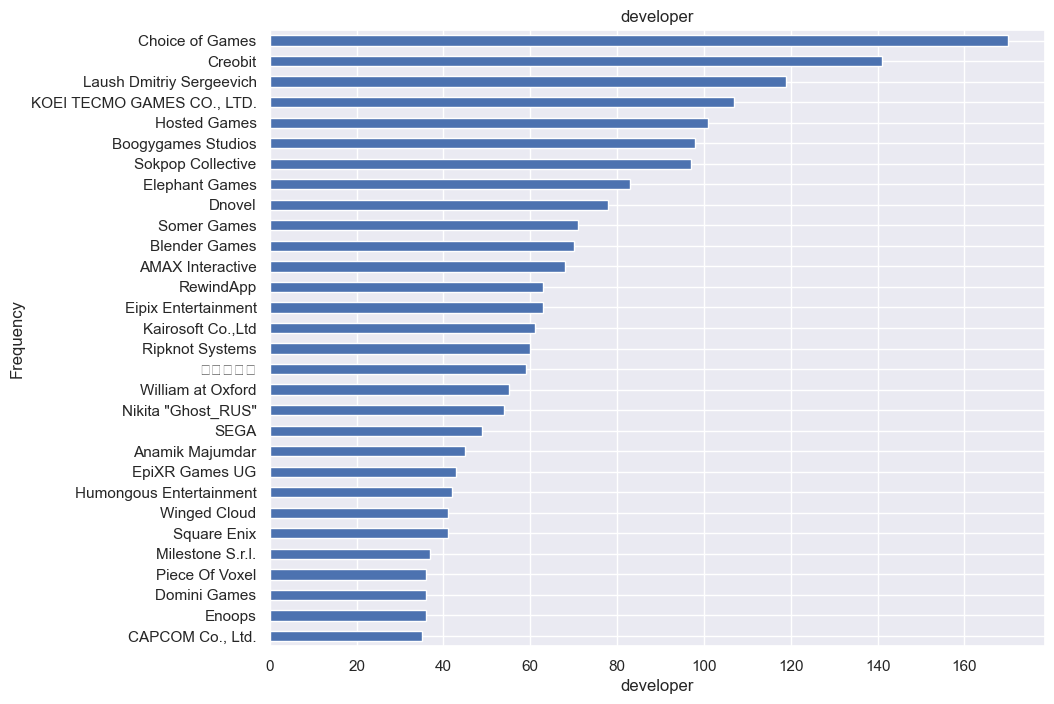

Total number of categories in developer: 35719
Choice of Games               170
Creobit                       141
Laush Dmitriy Sergeevich      119
KOEI TECMO GAMES CO., LTD.    107
Hosted Games                  101
Boogygames Studios             98
Sokpop Collective              97
Elephant Games                 83
Dnovel                         78
Somer Games                    71
Blender Games                  70
AMAX Interactive               68
RewindApp                      63
Eipix Entertainment            63
Kairosoft Co.,Ltd              61
Ripknot Systems                60
玫瑰工作室                          59
William at Oxford              55
Nikita "Ghost_RUS"             54
SEGA                           49
Anamik Majumdar                45
EpiXR Games UG                 43
Humongous Entertainment        42
Winged Cloud                   41
Square Enix                    41
Milestone S.r.l.               37
Piece Of Voxel                 36
Domini Games                   36
E

In [38]:
# only top 30 frequent categories for developer are plotted
column = 'developer'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(30).plot(kind = 'barh')
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(30))
#print(df)
print('\n')

## 7.2 Observation
- In the horizontal bar chart above, even though theres only the 30 top developers shown, we can see a difference in distribution. About 20 out of 35,718 developers have developed more than 50 games while the rest is less of that. This is an important observtion as this could prove to be a double edged sword. 
- Although Choice of Games has 170 games developed and released on steam, the popularity of these games might not be high. This might be due to factors such as not having the manpower to maintain these games with newer games being developed.
- On the flip side, the high number of games developed might be an indicator that a developer is able to develop good quality games. The repuation of the developer might push or pull gamers away from playing their games. <br>

**(this could be another thing to explore, developers and the games they produce)**

## 7.3 Publishers Column

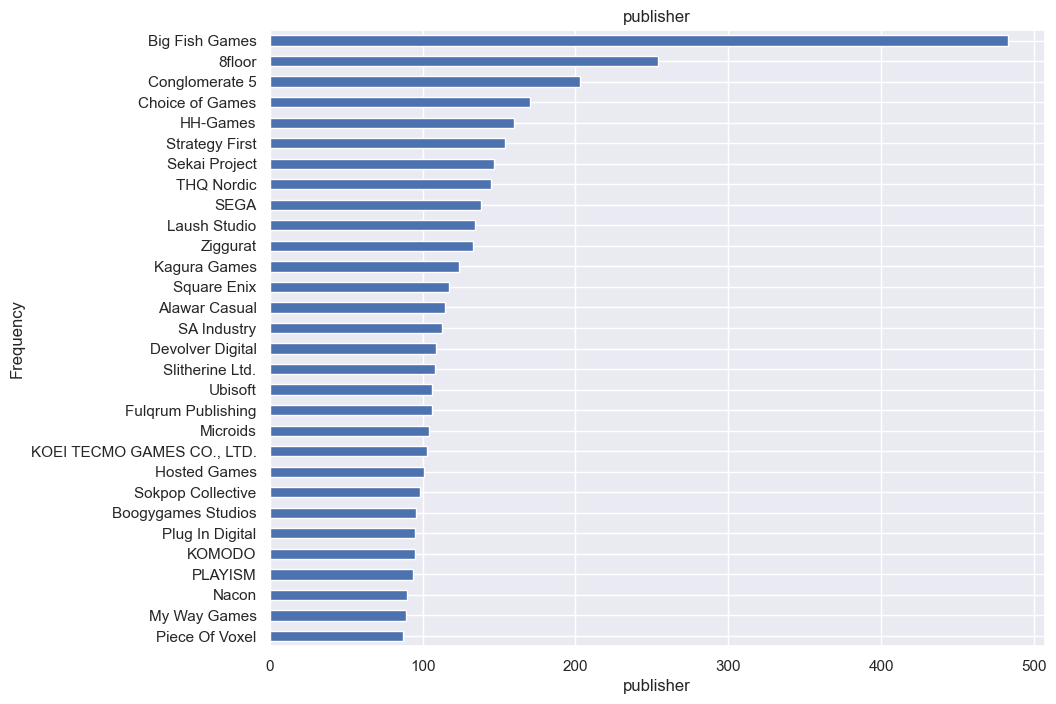

Total number of categories in publisher: 30958
Big Fish Games                483
8floor                        254
Conglomerate 5                203
Choice of Games               170
HH-Games                      160
Strategy First                154
Sekai Project                 147
THQ Nordic                    145
SEGA                          138
Laush Studio                  134
Ziggurat                      133
Kagura Games                  124
Square Enix                   117
Alawar Casual                 115
SA Industry                   113
Devolver Digital              109
Slitherine Ltd.               108
Ubisoft                       106
Fulqrum Publishing            106
Microids                      104
KOEI TECMO GAMES CO., LTD.    103
Hosted Games                  101
Sokpop Collective              98
Boogygames Studios             96
Plug In Digital                95
KOMODO                         95
PLAYISM                        94
Nacon                          90
M

In [39]:
# only top 30 frequent categories for publiser are plotted
column = 'publisher'
plt.figure(figsize = (10, 8))
df = steam[column].value_counts()
df.head(30).plot(kind = 'barh')
#df.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(column)
plt.show()
print(f'Total number of categories in {column}: {len(df)}')
print(df.head(30))
#print(df)
print('\n')

## 7.3 Observation
- In the horizontal bar chart above, similarly, only the top 30 publishers are shown. There is a clear distribution being shown here as almost all of the top 30 has more than 100 games published. The top publisher Big Fish Games has published almost 500 games, almost twice as much as the 2nd placed publisher 8 floor. This is a huge difference especially if compared to the rest of the publishers.
- Publishers might not face the same manpower constraints as the developers as publishers do not need to develop the game. However the combination of certain developers and publishers might be an interesting point to look at. Gamers might be more willing to play games published by certain publishers or even a combination of both

**(maybe can look into the combination of (developer,publisher) with relation to popularity of games**

## 8. Numeric Columns

In [40]:
# numeric columns
steam_num = ['positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']

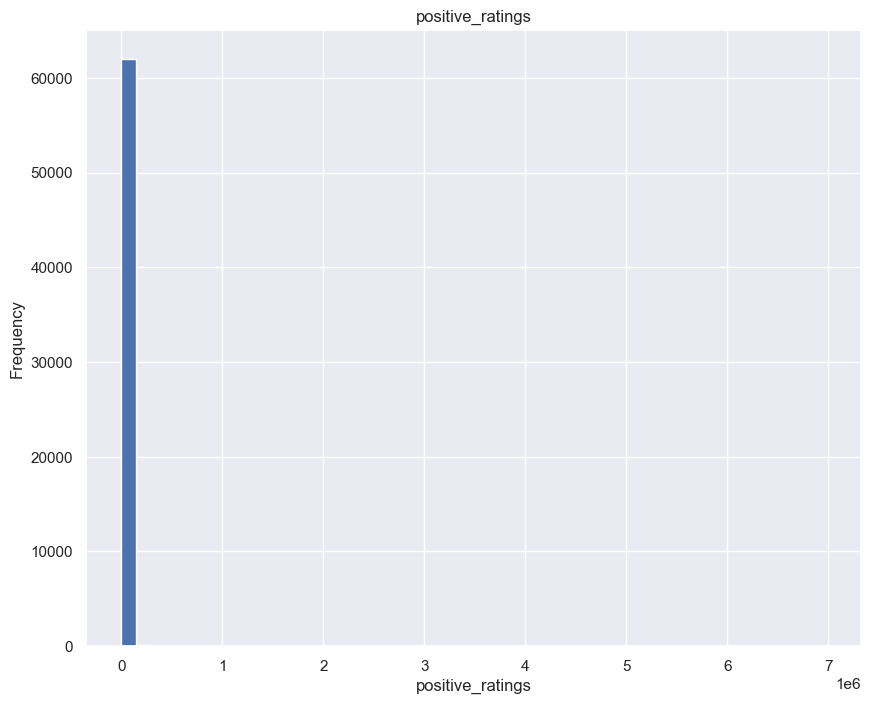

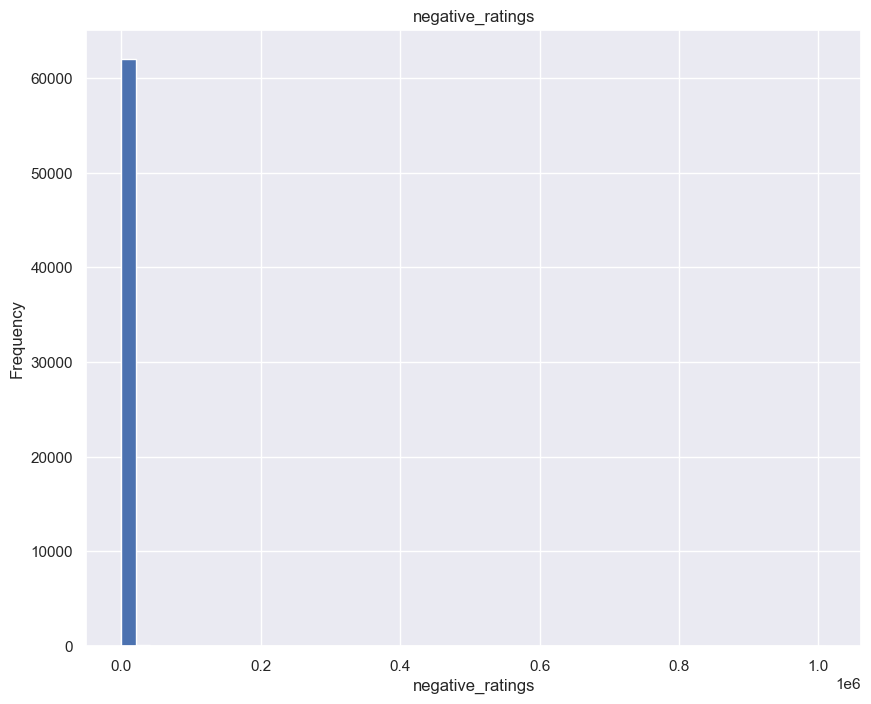

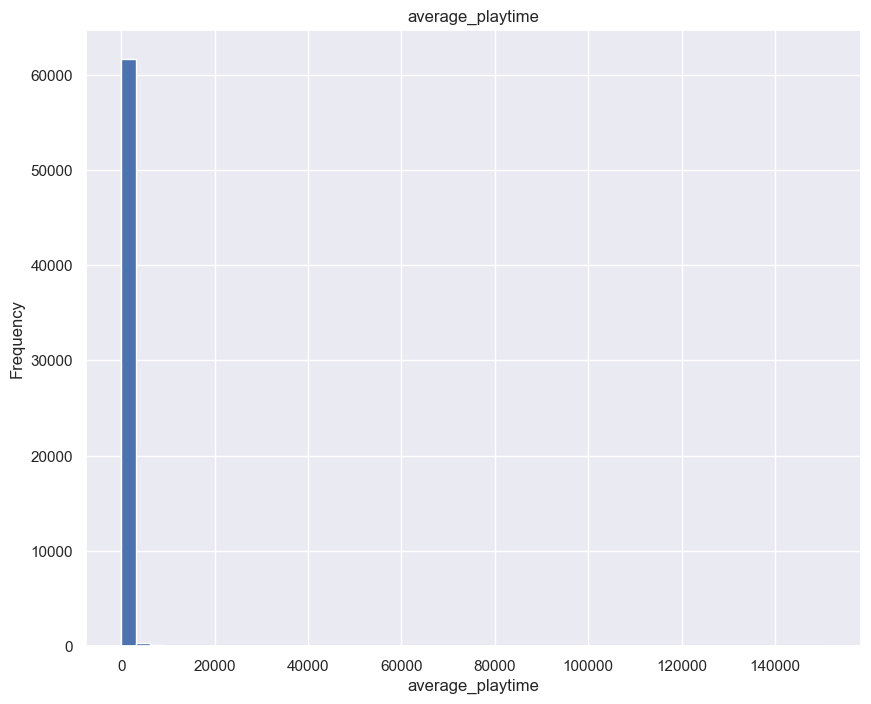

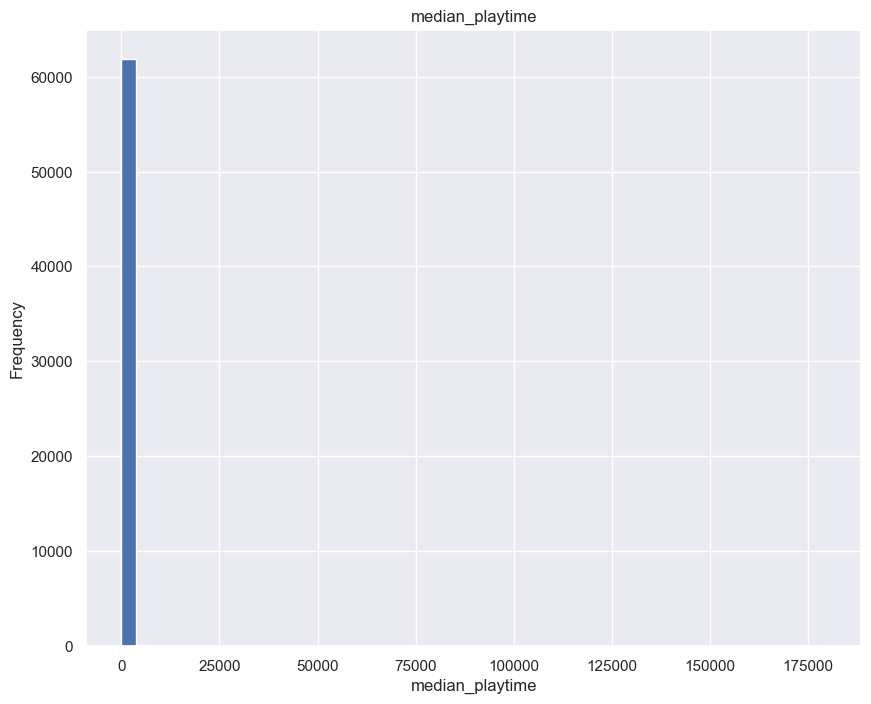

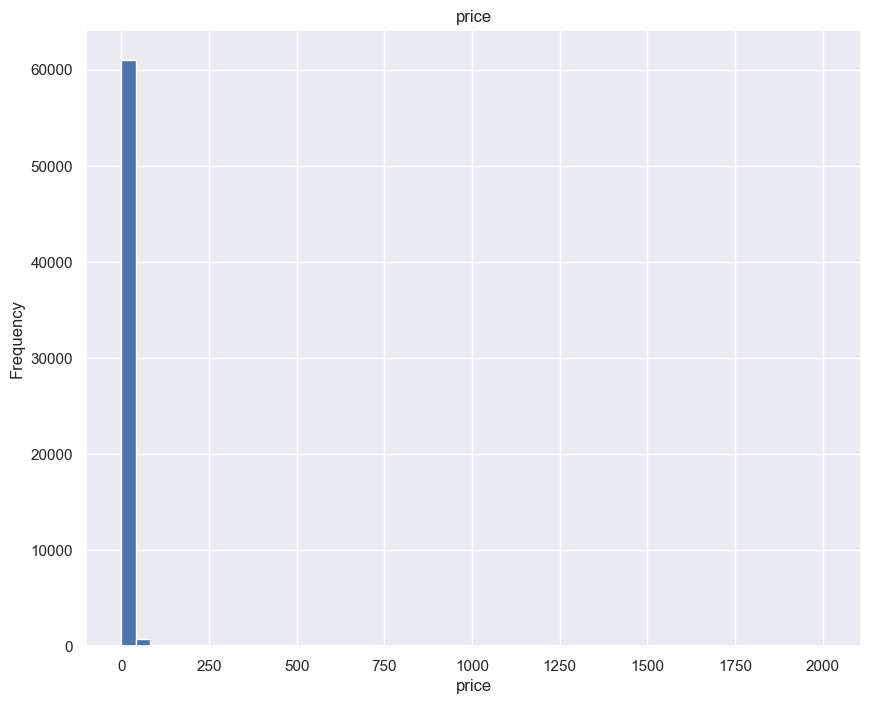

In [41]:
# visualize all numeric columns
for col in steam_num:
  plt.figure(figsize = (10, 8))
  steam[col].plot(kind = 'hist', bins = 50)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()
  print('\n')

Um. The data is extremely skewed. Let's exclude the outliers and zoom in..
## dk which data are being removed might be a good idea to print them out before removing

In [42]:
# write a function to remove outliers
# In the definition of box plots, values < Q1 - 1.5 IQR and values > Q3 + 1.5 IQR are the outliers
def remove_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  data_outlier_excluded = data[(data >= Q1 - (1.5 * IQR)) & (data <= Q3 + (1.5 * IQR))]
  return data_outlier_excluded

## 8.1 `positive_ratings`
Let's look at the top 10 games with the most positive ratings 

In [43]:
# top 10 game by positive ratings
steam.sort_values(by = 'positive_ratings', ascending = False).head(10)[['name', 'positive_ratings']]

,name,positive_ratings
22,Counter-Strike 2,6976943
19,Dota 2,1812144
12578,PUBG: BATTLEGROUNDS,1361485
1116,Terraria,1241092
5115,Tom Clancy's Rainbow Six® Siege,1081208
124,Garry's Mod,1024266
1975,Rust,911251
18,Left 4 Dead 2,825777
7519,Wallpaper Engine,751158
36335,ELDEN RING,742616


Now the distribution:

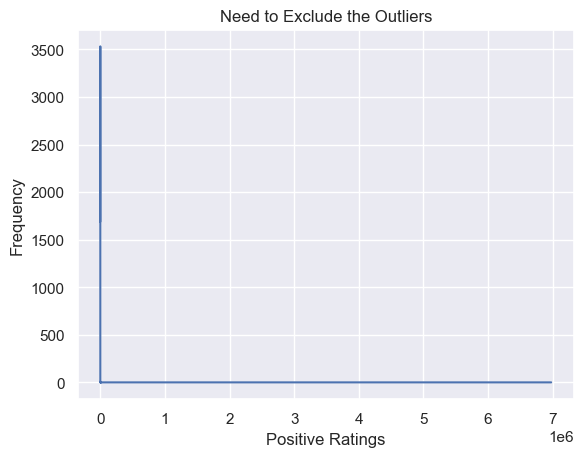

In [44]:
# plot the distribution of positive ratings
plt.figure()
steam['positive_ratings'].value_counts().sort_index().plot()
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Need to Exclude the Outliers')
plt.show()

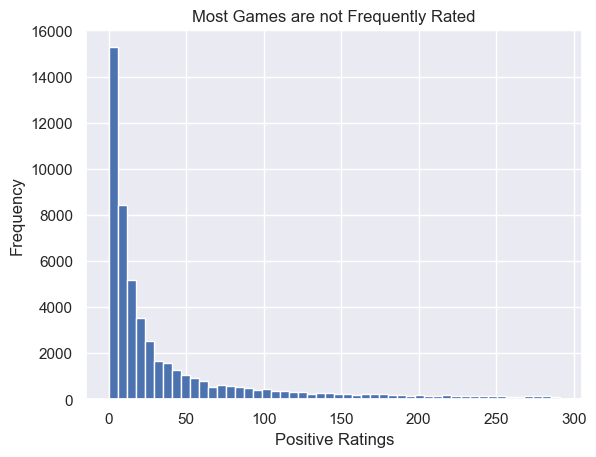

total games: 62057
games with positive ratings outliers excluded: 51704


In [45]:
# exclude outliers from positive_ratings
pos_r = steam['positive_ratings']
pos_r_ex = remove_outliers(pos_r)

# plot the distribution of positive ratings
plt.figure()
pos_r_ex.plot(kind = 'hist', bins = 50)
plt.xlabel('Positive Ratings')
plt.ylabel('Frequency')
plt.title('Most Games are not Frequently Rated')
plt.show()

# conclusion
print('total games:', len(pos_r))
print('games with positive ratings outliers excluded:', len(pos_r_ex))

Most Games are not frequently rated though. 
**E

In [46]:
pos_r_ex.head()

23     85
27    281
32    275
33    215
37    176
Name: positive_ratings, dtype: int64

## 8.2 `negative_ratings`
Top 10 with the most negative ratings

In [47]:
steam.sort_values(by = 'negative_ratings', ascending = False).head(10)[['name', 'negative_ratings']]

,name,negative_ratings
22,Counter-Strike 2,1010971
12578,PUBG: BATTLEGROUNDS,975066
19,Dota 2,399400
1689,War Thunder,231267
5115,Tom Clancy's Rainbow Six® Siege,185669
33908,Apex Legends™,177124
5919,Dead by Daylight,140702
1975,Rust,135032
31082,Cyberpunk 2077,133122
30907,Destiny 2,115431


A lot of overlap. Mostly because of popularity. <br>

We should look at the ratio instead. The table below is sorted with ratio of pos:neg. The highest ratio being at the top.

In [48]:
# ratio of positive/negative ratings
pos_neg_ratio = steam['positive_ratings'] / (steam['negative_ratings'] + 1) # +1 to avoid zero divisions
top_ratios_id = pos_neg_ratio.sort_values(ascending = False).head(10).index

steam.loc[top_ratios_id]

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,overall_rating,release_year
27509,992740,祈風 Inorikaze,2019-02-13,0,Twilight -日月之境-;觀象草圖 Astrolabe Draft,觀象草圖 Astrolabe Draft,windows,"[Single-player, Steam Achievements, Steam Clou...","[Adventure, Casual, Indie]",Adventure;Indie;Casual,368,0,53,53,20000,11.00,91.562417,2019
54848,1895350,I Wani Hug that Gator!,2024-02-14,1,Cavemanon,Cavemanon,windows;mac;linux,"[Single-player, Partial Controller Support, Fa...","[Casual, Indie]",Visual Novel;Story Rich;Choose Your Own Adventure,1662,8,1466,2248,100000,14.50,94.191636,2024
30393,1070550,Don't Escape Trilogy,2019-07-29,1,scriptwelder,Armor Games Studios,windows,"[Single-player, Steam Achievements, Family Sha...","[Adventure, Indie]",Adventure;Indie;Horror,366,1,0,0,20000,5.25,91.306051,2019
42104,1423370,NOeSIS02_羽化,2021-01-11,0,Classic Chocolat,Red × Balloon;Hikare 个人汉化,windows,[Single-player],"[Adventure, Casual, Free to Play, Indie, RPG, ...",RPG;2D;Anime,538,2,0,0,50000,0.00,92.137864,2021
49704,1684410,Seal World,2023-12-26,1,SealDev,SealDev,windows;mac;linux,"[Single-player, Steam Achievements, Full contr...",[Casual],Comedy;Cute;Funny,519,2,81,81,20000,5.25,92.044320,2023
20310,790060,The Void Rains Upon Her Heart,2018-02-14,1,Veyeral Games,The Hidden Levels,windows,"[Single-player, Steam Achievements, Full contr...","[Action, Indie, Early Access]",Action Roguelike;Indie;Bullet Hell,1182,6,974,974,50000,13.00,93.592272,2018
28831,1029650,יום פתוח (Open Day),2022-06-22,0,Rafael Ben-Ari,Rafael Ben-Ari,windows,"[Single-player, Steam Achievements, Full contr...","[Adventure, Indie, RPG]",Singleplayer;Top-Down;Turn-Based Combat,158,0,0,0,50000,14.50,89.128651,2022
38028,1295320,Can of Wormholes,2023-03-24,1,munted finger,munted finger,windows;mac,"[Single-player, Steam Achievements, Full contr...",[Indie],Indie;Puzzle;Sokoban,314,1,1162,1162,20000,18.50,90.869853,2023
22790,858940,Flowers -Le volume sur ete-,2018-07-26,1,Innocent Grey,JAST USA,windows,"[Single-player, Steam Trading Cards, Steam Clo...",[Casual],Visual Novel;LGBTQ+;Female Protagonist,1095,6,854,854,50000,18.50,93.418212,2018
29084,1035990,Dialtown: Phone Dating Sim,2022-02-14,1,DirectDoggo,DirectDoggo,windows,"[Single-player, Steam Achievements, Steam Trad...","[Casual, Indie]",Indie;Casual;Comedy,1492,9,0,0,100000,8.50,93.903913,2022


## 8.3 Analysis `negative` & `positive` ratings
In conclusion, rank the games with number of positive ratings but still show the negative ratings.
- Some of the games in the top 10 have high ratios but are not very popular. 
- These games have 0 average and median playtime, some have less than 20,000 owners <br>

Although the ratios might not be a good indicator of a popular game, the positive and negative ratings are still important indicators. The ratings provide developers with feedback from gamers, helping the developers improve their game in the long run.

In [49]:
ratings = pd.DataFrame(steam[['positive_ratings', 'negative_ratings']])
ratings.head()

,positive_ratings,negative_ratings
0,229766,5992
1,7005,1069
2,6036,664
3,2415,511
4,20697,1054


                  positive_ratings  negative_ratings
positive_ratings           1.00000           0.81287
negative_ratings           0.81287           1.00000


<Axes: >

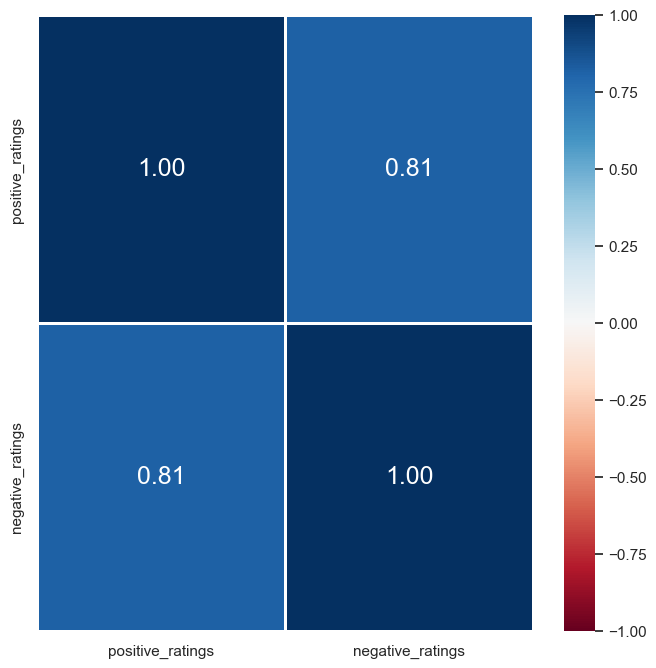

In [50]:
# Correlation Matrix
print(ratings.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(ratings.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

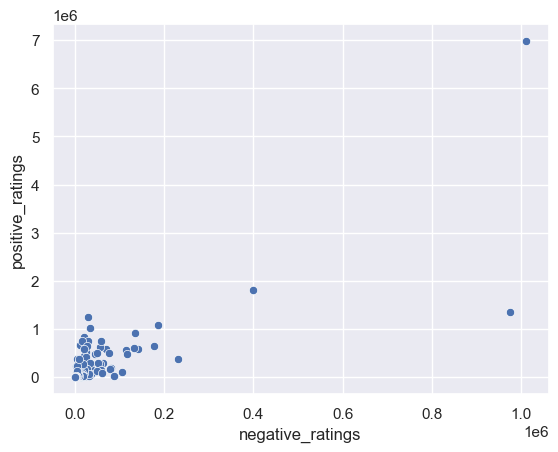

In [51]:
# Draw pairs of variables against one another
#sns.scatterplot(ratings)
ax = sns.scatterplot(x="negative_ratings", y="positive_ratings", data=ratings)

## 8.3 Observation
From the HeatMap and ScatterPlot, we can see that the positive and negative ratings have a high correlation of 0.81 with each other. This might be due to the differing opinions of players who own the game. Thus the both `ratings` column might not be good columns to use when evaluating whether a game is popular or not.

## 8.4 `average_playtime`
in minutes

In [52]:
# check 0 values in average_playtime
print('total games:', steam.shape[0])
print('games with average playtime != 0:', steam[steam['average_playtime'] != 0].shape[0])

total games: 62057
games with average playtime != 0: 15212


In [53]:
# Percentage = ((playtime !=0) / total games) * 100
print('Percentage of total Games played:', (steam[steam['average_playtime'] != 0].shape[0]/steam.shape[0])*100)

Percentage of total Games played: 24.51294777382084


### Observation
As we can see from the percentage, out of the **62,056** games on steam, only **24%** of them are being played by the users of steam. This is a very low percentage as this indicates some games haven't been played since its release <br> 
(maybe can display these games)

In [54]:
# top 10 games with longest average playtime
steam.sort_values(by = 'average_playtime', ascending = False).head(n=10)

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,overall_rating,release_year
3620,315810,eden*,2015-01-30,1,minori,MangaGamer,windows,"[Single-player, Steam Trading Cards, Steam Clo...",[Adventure],Visual Novel;Anime;Story Rich,3710,115,150964,168,200000,20.0,92.945853,2015
2359,269470,MorphVOX Pro 4 - Voice Changer (Old),2014-02-13,1,Screaming Bee,Screaming Bee,windows,"[Single-player, Steam Cloud]","[Audio Production, Utilities]",Audio Production;Utilities;Software,341,257,142090,142090,20000,39.0,52.864933,2014
27099,979920,Supremacy 1914: World War 1,2019-07-16,1,Bytro Labs GmbH,Bytro Labs GmbH,windows;mac,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Free to Play, Massively Multiplayer, Simulati...",Strategy;Free to Play;War,2413,795,90871,179708,500000,0.0,71.908643,2019
15402,663690,Rival Rampage,2017-07-11,1,Oddscure;RadioDog,Oddscure,windows,"[Multi-player, Co-op, Online Co-op]","[Action, Indie]",Action;Indie;Multiplayer,47,13,78283,78283,50000,0.0,66.970706,2017
43535,1469160,Wartune Reborn,2021-02-26,1,7Road,7Road,windows,"[Single-player, Multi-player, MMO, PvP, Online...","[Adventure, Casual, Free to Play, Massively Mu...",Turn-Based Combat;Massively Multiplayer;Multip...,152,76,71854,71854,100000,0.0,60.172888,2021
43536,1469160,Wartune Reborn,2021-02-26,1,7Road,7Road,windows,"[Single-player, Multi-player, MMO, PvP, Online...","[Adventure, Casual, Free to Play, Massively Mu...",Turn-Based Combat;Massively Multiplayer;Multip...,152,76,71854,71854,100000,0.0,60.172888,2021
20333,790710,World of Warplanes,2022-10-02,1,Wargaming Group Limited,Wargaming Group Limited,windows,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Massively Multiplayer, Simulation, Fr...",Free to Play;Third-Person Shooter;Massively Mu...,3232,1203,44521,196,1000000,0.0,69.966193,2022
19,570,Dota 2,2013-09-07,1,Valve,Valve,windows;mac;linux,"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]",Free to Play;MOBA;Multiplayer,1812144,399400,39226,877,500000000,0.0,81.436111,2013
33019,1147690,NGU IDLE,2019-01-10,1,4G,4G,windows,"[Single-player, Steam Achievements, In-App Pur...","[Adventure, Indie, Simulation, Free to Play]",Free to Play;Idler;Indie,10506,420,38479,993,1000000,0.0,93.230215,2019
2376,269950,X-Plane 11,2017-03-30,1,Laminar Research,Laminar Research,windows;mac;linux,"[Single-player, Multi-player, PvP, Shared/Spli...",[Simulation],Simulation;Flight;Realistic,16102,1263,35215,10254,2000000,26.0,90.272615,2017


### 8.4 Observation
- The 1st game on the top of the list has an `average_playtime` of about 151,000 minutes. That equates to an astounding **2,500 hours** of playtime on average. <br>

- Another interesting observation is that 2 games in the top 5 have less than 50,000 owners. This is quite unexpected as usually a high number of copies of a game would have a high number of playtime recorded. This is an interesting outlier which may be present in other cases. 
- There may even be cases where a game with high number of copies has a low average_playtime which is another outlier 

